In this guided project, you'll practice recreating some of the plots using Matplotlib that Seaborn and Pandas allow you to generate using high-level functions. This deliberate practice will help prepare you for creating new kinds of plots in the future that these libraries don't provide.

We'll continue to work with the dataset from the American Community Survey on job outcomes for recent college graduates. Here are some of the columns in the dataset:
* Rank - Rank by median earnings
* Major_code - Major code
* Major - Major description
* Major_category - Category of major
* Total - Total number of people with major
* Sample_size - Sample size (unweighted) of full-time
* Men - Male graduates
* Women - Female graduates
* ShareWomen - Women as share of total
* Employed - Number employed

Before we start creating data visualizations, let's import the libraries we need and remove rows contain null values.

In [1]:
# Setup the environment by importing the libraries we need
import pandas as pd
import matplotlib.pyplot as plt

# And run the necessary Jupyter magic so plots are displayed inline
%matplotlib notebook

In [2]:
# Read the dataset into a DataFrame
recent_grads = pd.read_csv('../data/recent-grads.csv')

# Start exploring the beginning and end of the data
recent_grads.head()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,Biology & Life Science,8409,47,3050,5359,0.637293,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,Psychology & Social Work,2854,7,522,2332,0.817099,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,2838,13,568,2270,0.799859,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,4626,21,931,3695,0.798746,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,Education,1098,2,134,964,0.877960,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
# Look at some summary statistics
recent_grads.describe()

/home/todd/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39167.716763,356.080925,16637.358382,22530.358382,0.522550,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068587,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63354.613919,618.361022,28063.394844,40966.381219,0.230572,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.029967,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,2.000000,119.000000,0.000000,0.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4361.000000,39.000000,2110.000000,1784.000000,0.339671,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,NaN,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15058.000000,130.000000,5347.000000,8284.000000,0.535714,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,NaN,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38844.000000,338.000000,14440.000000,22456.000000,0.702020,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,NaN,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
# Use shape to see how many rows and columns we have
recent_grads.shape

(173, 21)

In [6]:
# Create a new DataFrame with rows containing NaN values dropped
filtered_recent = recent_grads.dropna()

# And make sure we didn't drop too many rows
filtered_recent.shape

(172, 21)

# Scatter Matrix with Pandas

<IPython.core.display.Javascript object>


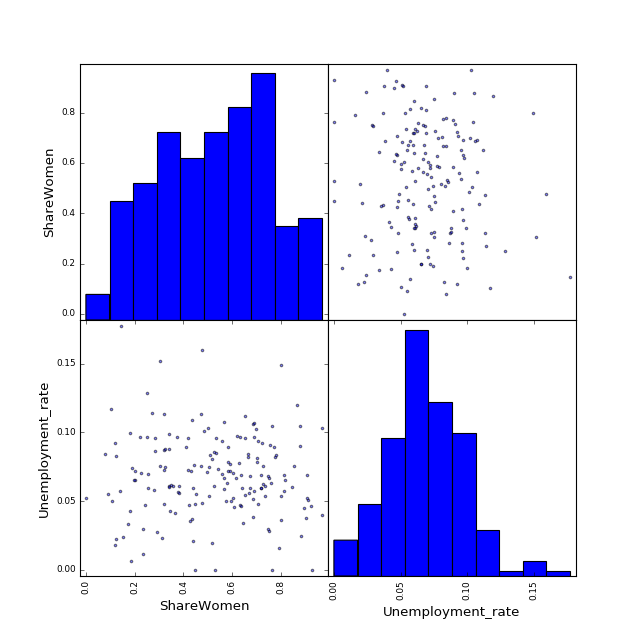

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe7989f6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7efe797ddc88>]], dtype=object)

In [8]:
# Create a scatter matrix with pandas
pd.scatter_matrix(recent_grads[['ShareWomen', 'Unemployment_rate']], figsize=(8,8))

# Scatter Matrix with Matplotlib

<IPython.core.display.Javascript object>


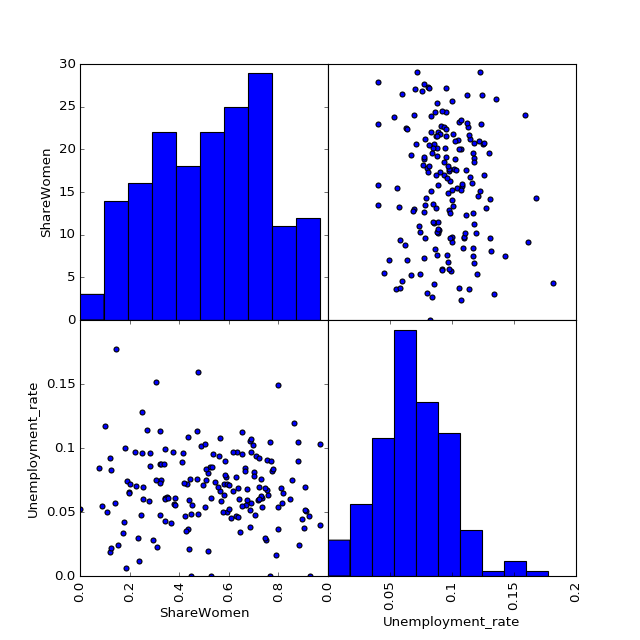

In [9]:
# Create a Figure instance and create 4 Axes instances
fig = plt.figure(figsize=(8,8))
ax11 = fig.add_subplot(2,2,1)
ax12 = fig.add_subplot(2,2,2)
ax21 = fig.add_subplot(2,2,3)
ax22 = fig.add_subplot(2,2,4)

# Now that we have 4 Axes instances, we can generate graphs for each
ax11.hist(filtered_recent['ShareWomen'])
ax22.hist(filtered_recent['Unemployment_rate'])
ax12.scatter(filtered_recent['Unemployment_rate'], filtered_recent['ShareWomen'])
ax21.scatter(filtered_recent['ShareWomen'], filtered_recent['Unemployment_rate'])

# Now let's tweak the appearance.

# To tweak how the axis ticks look, you need to grab a subplot's XAxis
# or YAxis instance and call specific methods.
# Use the Axes methods get_xaxis() and get_yaxis() to get these axes.

# Hide the x-axis ticks for the 2 subplots on the top row
ax11.xaxis.set_visible(False)
ax12.xaxis.set_visible(False)
ax12.yaxis.set_visible(False)
ax22.yaxis.set_visible(False)

# Assign the column names as the x-aix and y-axis labels
ax11.set_ylabel('ShareWomen')
ax21.set_ylabel('Unemployment_rate')
ax21.set_xlabel('ShareWomen')
ax22.set_xlabel('Unemployment_rate')

# Remove the spacing between subplots to match the Pandas scatter matrix
fig.subplots_adjust(wspace=0, hspace=0)

# The last remaining piece is to customize the x-axis and y-axis ticks

# Use the Axes methods set_xlim() and set_ylim to set data limits
ax11.set(ylim=(0,30))
ax12.set(ylim=(0.0,1.0))
ax21.set(xlim=(0.0,1.0), ylim=(0.0,0.20))
ax22.set(xlim=(0.0,0.20))

# Use the Axes metods set_xticklabels and set_yticklabels()
ax11.set_yticklabels([0, 5, 10, 15, 20, 25, 30])
ax21.set_yticklabels([0.0, 0.05, 0.10, 0.15])
ax21.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
ax22.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

# Grouped Bar Plot with Pandas
Since the dataset on recent college graduates contains information on the number of males and females included in the study, you can create a grouped bar plot to compare the gender ratios across majors.

In [10]:
# Add a ShareMen column
recent_grads['ShareMen'] = 1 - recent_grads['ShareWomen']

In [11]:
# First filter the DataFrame down to the columns you want visualized
arts = recent_grads[recent_grads['Major_category'] == 'Arts']
arts.set_index("Major", inplace=True)
arts.head()

,Rank,Major_code,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
Major,,,,,,,,,,,,,,,,,,,,,
MISCELLANEOUS FINE ARTS,33,6099,Arts,3340,30,1970,1370,0.410180,2914,2049,...,1200,286,0.089375,50000,25000,66000,693,1714,755,0.589820
COMMERCIAL ART AND GRAPHIC DESIGN,96,6004,Arts,103480,1186,8617,5156,0.374356,83483,67448,...,52243,8947,0.096798,35000,25000,45000,37389,38119,14839,0.625644
FILM VIDEO AND PHOTOGRAPHIC ARTS,142,6005,Arts,38761,331,22339,49030,0.686993,31433,22457,...,15740,3718,0.105772,32000,22000,42000,7368,20721,5862,0.313007
MUSIC,147,6002,Arts,60633,419,15670,12543,0.444582,47662,29010,...,21425,3918,0.075960,31000,22300,42000,13752,28786,9286,0.555418
FINE ARTS,150,6000,Arts,74440,623,24786,49654,0.667034,59679,42764,...,31877,5486,0.084186,30500,21000,41000,20792,32725,11880,0.332966


<IPython.core.display.Javascript object>


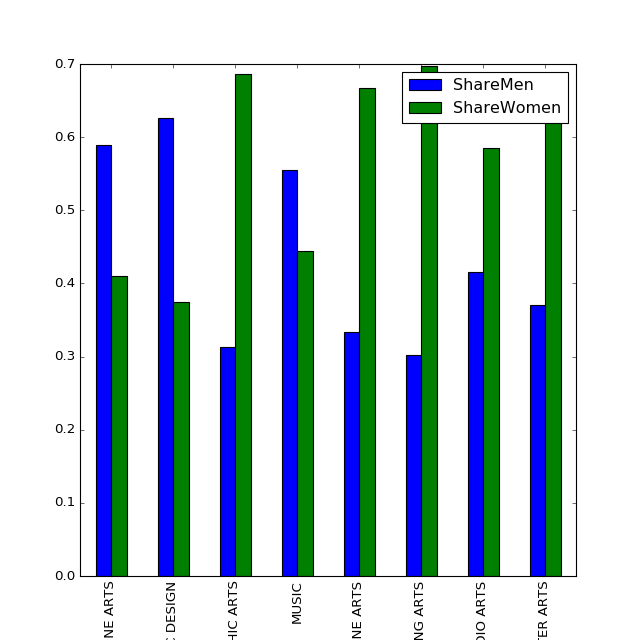

In [12]:
# Create a Grouped Bar Plot using Pandas
arts[['ShareMen', 'ShareWomen']].plot(kind='bar', figsize=(8,8))

# Grouped Bar Plot using Matplotlib

In [13]:
# import NumPy and use arange to generate a list of integer values
import numpy as np
locs = np.arange(len(arts))
locs

array([0, 1, 2, 3, 4, 5, 6, 7])

<IPython.core.display.Javascript object>


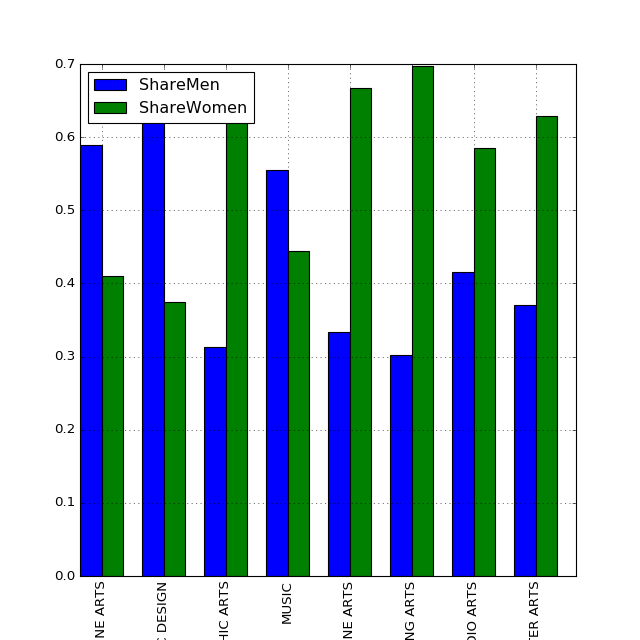

In [14]:
# Create a Figure instance and add a single subplotplot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

# Generate the bars for the ShareMen column
bar_width = 0.35
bar_1 = ax.bar(left=locs, height=arts['ShareMen'], width=bar_width)

# Use the Axes method set_xticklabels() to assign the major names
ax.set_xticklabels(arts.index, rotation=90)

# We need a list of placement values for the new bars that are offset
offset_locs = locs + bar_width

# Generate the bars for the ShareWomen column
bar_2 = ax.bar(left=offset_locs, height=arts['ShareWomen'], width=bar_width, color='green')

# Align the x-asis labels better with the grouped bars
ax.set_xticks(offset_locs)

# Create a legend
plt.legend((bar_1, bar_2), ('ShareMen', 'ShareWomen'), loc='upper left')

# Display the baground grid
plt.grid(True)

# Next Steps
Here are some ideas to continue practicing what you've learned:
* Visualize the gender ratios for each major by creating a stacked box plot instead of a grouped bar plot
* Practice generating histograms from scratch without relying on the Matplotlib method hist()
* Practice generating box plots using Matplotlib only
* Structure your Matplotlib code as a function so you can reuse the code.
  * Write a function that takes in a DataFrame, takes in a list of column names, and generates a scatter matrix for combinations of columns.
    * While the scatter matrix you generated in this guided project used 2 columns, how can you generalize the code to handle n columns.
    * As n gets larger, how do you dynamically specify the figsize parameter when creating the Plot instance so the data visualization is legible with more subplots.

<IPython.core.display.Javascript object>


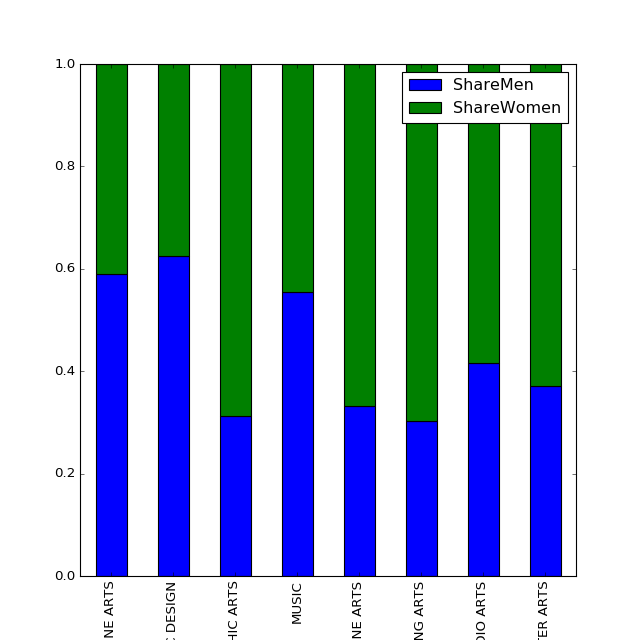

In [15]:
# Gender ratios stacked bar plot
arts[['ShareMen', 'ShareWomen']].plot.bar(figsize=(8,8), stacked=True)

<IPython.core.display.Javascript object>


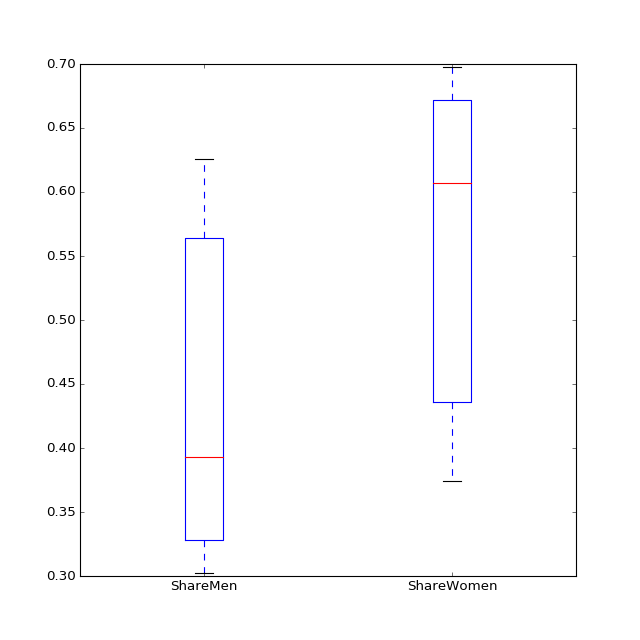

In [16]:
# Box plot
arts[['ShareMen', 'ShareWomen']].plot.box(figsize=(8,8))